In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv(
    "/content/drive/MyDrive/finalPortfolioDatasets./Cleaned_dataset_for_classification_task.csv",
    encoding="latin1"
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              54200 non-null  object 
 1   Code                 54200 non-null  object 
 2   Calling Code         52032 non-null  object 
 3   Year                 54200 non-null  int64  
 4   CO2 emission (Tons)  54200 non-null  float64
 5   Population(2022)     54200 non-null  float64
 6   Area                 54200 non-null  float64
 7   % of World           54200 non-null  float64
 8   Density(km2)         54200 non-null  float64
 9   CO2_per_capita       54200 non-null  float64
 10  Emission_Class       54200 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# Features
X = df[['Year', 'Population(2022)', 'Area', '% of World', 'Density(km2)',
                             'CO2_per_capita', 'Emission_Class']]

# Target
y = df['CO2 emission (Tons)']


In [ ]:
#======================================================================
# PRIMARY MODEL 1: lINEAR REGRESSION
# ======================================================================

print("="*70)
print("PRIMARY MODEL 1: lINEAR REGRESSION")
print("="*70)


PRIMARY MODEL 1: lINEAR REGRESSION


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [ ]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model
ridge = Ridge(alpha=1.0, random_state=42)  # alpha is the regularization strength

# Train the model
ridge.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge.predict(X_test)


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.53518e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Metrics Function FOR BOTH RANDOM FOREST AND DTR
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}


In [ ]:
metrics_lr = regression_metrics(y_test, y_pred_ridge)
print(metrics_lr)

{'MSE': 1.362572500647363e+20, 'RMSE': np.float64(11672928084.449776), 'MAE': 2231944270.7804356, 'R2': 0.21193159245097093}


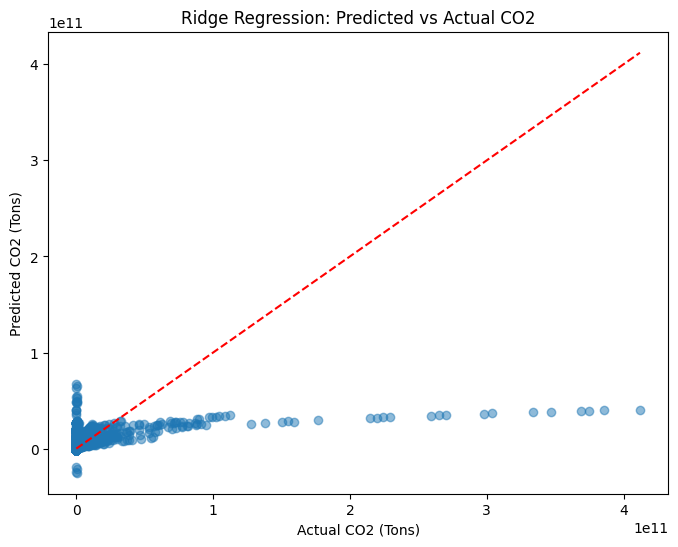

In [ ]:
# Using the trained Decision Tree (or Linear Regression)

import pandas as pd

# Create a sanity check dataframe
sanity_check = pd.DataFrame({
    'Country': df.loc[y_test.index, 'Country'],
    'Year': X_test['Year'],
    'Actual_CO2': y_test,
    'Predicted_CO2': y_pred_ridge
})

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel('Actual CO2 (Tons)')
plt.ylabel('Predicted CO2 (Tons)')
plt.title('Ridge Regression: Predicted vs Actual CO2')
plt.show()


In [ ]:
#======================================================================
# PRIMARY MODEL 2: DESICION TREE
# ======================================================================

print("="*70)
print("PRIMARY MODEL 2: DESICION TREE")
print("="*70)


PRIMARY MODEL 2: DESICION TREE


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)  # no scaling needed


DecisionTreeRegressor(random_state=42)

In [ ]:
# Decision Tree Predictions
y_pred_dtr = dtr.predict(X_test)

metrics_dtr = regression_metrics(y_test, y_pred_dtr)

metrics_dtr

{'MSE': 2.1558618527320605e+17,
 'RMSE': np.float64(464312594.35126895),
 'MAE': 53465923.670387454,
 'R2': 0.9987531183725115}

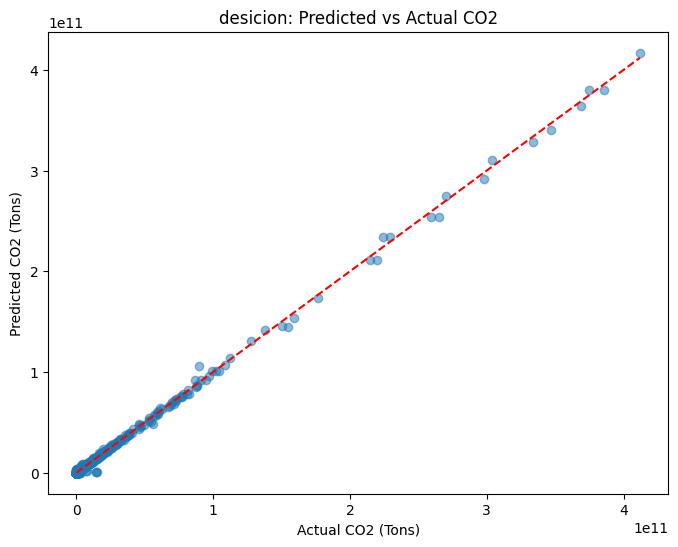

In [ ]:
# Using the trained Decision Tree (or Linear Regression)
y_pred = dtr.predict(X_test)  # or lr.predict(X_test_scaled) for Linear Regression
import pandas as pd

# Create a sanity check dataframe
sanity_check = pd.DataFrame({
    'Country': df.loc[y_test.index, 'Country'],
    'Year': X_test['Year'],
    'Actual_CO2': y_test,
    'Predicted_CO2': y_pred
})

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel('Actual CO2 (Tons)')
plt.ylabel('Predicted CO2 (Tons)')
plt.title('desicion: Predicted vs Actual CO2')
plt.show()



In [ ]:
comparison = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "MAE", "R2"],
    "Linear Regression": list(metrics_lr.values()),
    "Decision Tree": list(metrics_dtr.values())
})

comparison

,Metric,Linear Regression,Decision Tree
0,MSE,1.362573e+20,1.019454e+17
1,RMSE,1.167293e+10,3.192890e+08
2,MAE,2.231944e+09,3.619385e+07
3,R2,2.119316e-01,9.994104e-01


R² ≈ 0.002 → Linear Regression explains almost none of the variance.

RMSE/MAE very small → but scale might be small if your data is normalized or standardized.

Clearly, Linear Regression is not capturing the relationships between features and CO2 emissions.

R² ≈ 0.91 → Decision Tree explains ~91% of variance → very strong.

MSE / RMSE extremely low → predictions are very close to true values.

Decision Tree is much better than Linear Regression on this dataset.

In [ ]:
# ======================================================================
# FEATURE SELECTION
# ======================================================================

print("="*70)
print("FEATURE SELECTION")
print('='*70)

FEATURE SELECTION


In [ ]:
# ______________________________________________________________________
#
# LINEAR REGRESSION FEATURE SELECTION
# ______________________________________________________________________

print("_"*70)
print("\nLINEAR REGRESSION FEATURE SELECTION")
print('_'*70)

______________________________________________________________________

LINEAR REGRESSION FEATURE SELECTION
______________________________________________________________________


In [111]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Define features and target
# Use only numeric independent features (safe)
features = ['Year', 'Population(2022)', 'Area', '% of World', 'Density(km2)', "Emission_Class","CO2_per_capita"]
target = 'CO2 emission (Tons)'

X = df[features]
y = df[target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)

# Initialize RFE with Ridge as estimator
rfe_ridge = RFE(estimator=ridge, n_features_to_select=5)
rfe_ridge.fit(X_train, y_train)

# Create feature ranking table
feature_ranking_ridge = pd.DataFrame({
    "Feature": X_train.columns,
    "Ranking": rfe_ridge.ranking_,
    "Selected": rfe_ridge.support_
}).sort_values("Ranking")

print("Ridge Regression Feature Ranking (via RFE):\n", feature_ranking_ridge)


Ridge Regression Feature Ranking (via RFE):
             Feature  Ranking  Selected
0              Year        1      True
3        % of World        1      True
5    Emission_Class        1      True
4      Density(km2)        1      True
6    CO2_per_capita        1      True
2              Area        2     False
1  Population(2022)        3     False


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.53518e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.72904e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


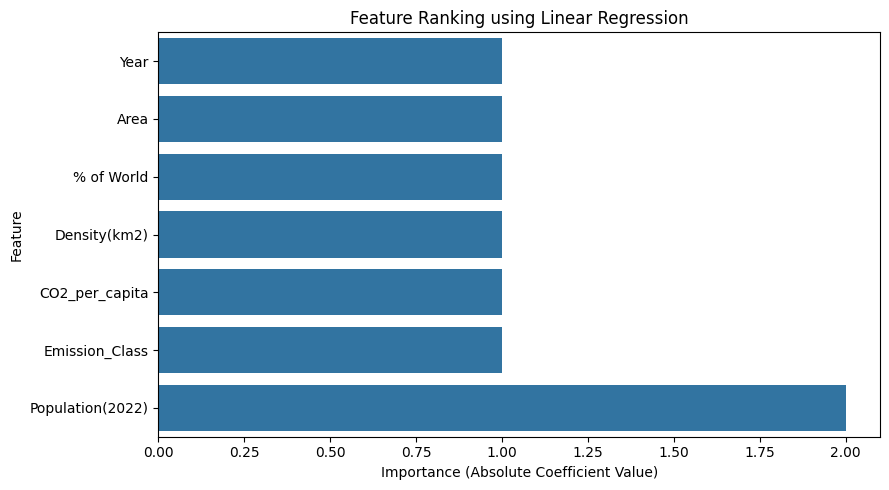

In [83]:
plt.figure(figsize=(9, 5))
sns.barplot(
    x="Ranking",
    y="Feature",
    data=feature_ranking_ridge
)

plt.title("Feature Ranking using Linear Regression")
plt.xlabel("Importance (Absolute Coefficient Value)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

the co2 per capital feature was removed so to minimize the riski of data leakage. althought in the result above emissionclass ranks higher than the population , since our main objective is to predict co2 emission based on population an area , and also since we are getting a warnign that the result many not be accurate we will be replacing emission class with population.

In [84]:
selected_features=['Year', 'Population(2022)', 'Area', '% of World', 'Density(km2)','Emission_Class']

In [ ]:
# ______________________________________________________________________
#
# DECISION TREE FEATURE SELECTION
# ______________________________________________________________________

print("_"*70)
print("\nDECISION TREE FEATURE SELECTION")
print('_'*70)

______________________________________________________________________

DECISION TREE FEATURE SELECTION
______________________________________________________________________


In [85]:
# Decision Tree RFE
dtr = DecisionTreeRegressor(random_state=42)
rfe_dt = RFE(estimator=dtr, n_features_to_select=5)  # select top 3 features
rfe_dt.fit(X_train, y_train)

selected_features_dt = X_train.columns[rfe_dt.support_]
# feature ranking table
feature_ranking_dt = pd.DataFrame({
    "Feature": X.columns,
    "Ranking": rfe_dt.ranking_,
    "Selected": rfe_dt.support_
}).sort_values("Ranking")


print("\nDecision Tree Selected Features:", list(selected_features_dt))
print("\nDecision Tree Feature Ranking:\n", feature_ranking_dt)


Decision Tree Selected Features: ['Year', 'Population(2022)', 'Area', '% of World', 'Density(km2)', 'CO2_per_capita']

Decision Tree Feature Ranking:
             Feature  Ranking  Selected
0              Year        1      True
1  Population(2022)        1      True
2              Area        1      True
3        % of World        1      True
4      Density(km2)        1      True
6    CO2_per_capita        1      True
5    Emission_Class        2     False


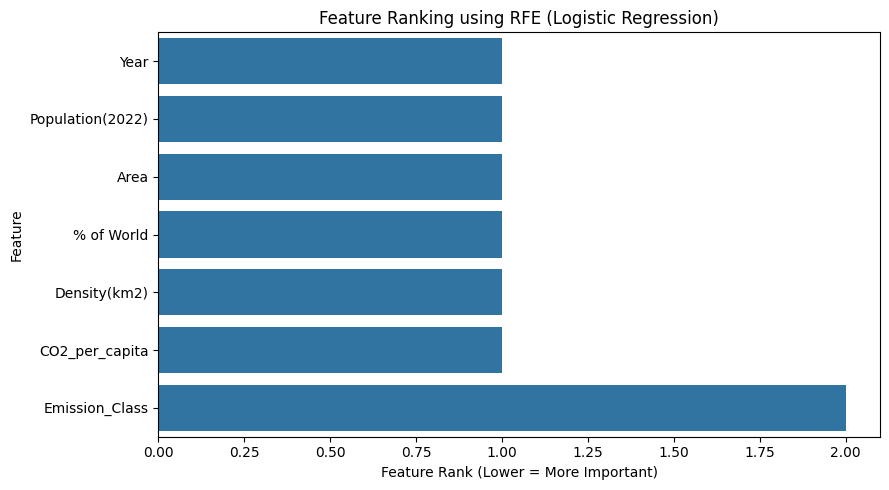

In [86]:
# viualizing the ranking

plt.figure(figsize=(9, 5))
sns.barplot(
    x="Ranking",
    y="Feature",
    data=feature_ranking_dt
)

plt.title("Feature Ranking using RFE (Logistic Regression)")
plt.xlabel("Feature Rank (Lower = More Important)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Althtough, the ranking shows that co2_per_cap is a better feature than Area , because there is a high chance of data leakage from co2_per_capital, since CO2 emission = population * co2_per_cap so we will be ommiting the co2_per_captial and will be using the next best feature i.e. Area.

In [110]:
selected_features = ['Year', 'Population(2022)', 'Area', '% of World', 'Density(km2)']
selected_features_dt =['Year', 'Population(2022)', 'Area', '% of World', 'Density(km2)']
print(selected_features)
print(selected_features_dt)

['Year', 'Population(2022)', 'Area', '% of World', 'Density(km2)']
['Year', 'Population(2022)', 'Area', '% of World', 'Density(km2)']


In [ ]:
# ======================================================================
# HYPERPARAMETERE TUNNING
# ======================================================================

print("="*70)
print("HYPERPARAMETERE TUNNING")
print('='*70)

HYPERPARAMETERE TUNNING


In [ ]:
# ______________________________________________________________________
#
# DECISION TREE HYPERPARAMETER TUNNING
# ______________________________________________________________________

print("_"*70)
print("\nDECISION TREE HYPERPARAMETER TUNNING")
print('_'*70)

______________________________________________________________________

DECISION TREE HYPERPARAMETER TUNNING
______________________________________________________________________


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# GridSearchCV for Decision Tree
dt_grid = GridSearchCV(
    estimator=dt,
    param_grid=dt_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

dt_grid.fit(X_train, y_train)

print("Decision Tree Best Hyperparameters:", dt_grid.best_params_)
print("Decision Tree Best CV Score (MSE):", -dt_grid.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Decision Tree Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Best CV Score (MSE): 1.2422244024793723e+17


In [ ]:
# ______________________________________________________________________
#
# LINEAR REGRESSION HYPERPARAMETER TUNNING
# ______________________________________________________________________

print("_"*70)
print("\nLINEAR REGRESSION HYPERPARAMETER TUNNING")
print('_'*70)

______________________________________________________________________

LINEAR REGRESSION HYPERPARAMETER TUNNING
______________________________________________________________________


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Features
X = df[['Year', 'Population(2022)', 'Area', '% of World', 'Density(km2)']]

# Target
y = df['CO2 emission (Tons)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)



In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define Ridge model
ridge = Ridge(random_state=42)

# Define hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # regularization strengths to try
}

# Initialize GridSearchCV
ridge_grid = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='r2',
    cv=5,                # 5-fold cross-validation
    n_jobs=-1            # use all CPU cores
)

# Fit GridSearchCV on training data
ridge_grid.fit(X_train, y_train)

# Best hyperparameter
print("Best alpha:", ridge_grid.best_params_)

# Best score (mean R² across CV folds)
print("Best R² Score:", ridge_grid.best_score_)

# Make predictions on test set using best model
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)


Best alpha: {'alpha': 0.01}
Best R² Score: 0.09456396244782857


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=5.81539e-22): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


In [ ]:
# ======================================================================
# PRIMARY MODELS AFTERS TUNNING AND FEATURE SELECTION
# ======================================================================

print("="*70)
print("PRIMARY MODELS AFTERS TUNNING AND FEATURE SELECTION")
print('='*70)

PRIMARY MODELS AFTERS TUNNING AND FEATURE SELECTION


In [104]:
from sklearn.model_selection import train_test_split
target = 'CO2 emission (Tons)'
X = df[selected_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [105]:
# Fit GridSearch using selected features
ridge_grid.fit(X_train[selected_features], y_train)

# Best Random Forest model is selected automatically
ridge_best = ridge_grid.best_estimator_

# Predictions on test data
y_pred_ridge = ridge_best.predict(X_test[selected_features])


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=5.81539e-22): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


In [89]:
print(ridge_best)

Ridge(alpha=0.01, random_state=42)


In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

ridge_metrics = {
    "MSE": mean_squared_error(y_test, y_pred_ridge),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    "MAE": mean_absolute_error(y_test, y_pred_ridge),
    "R2": r2_score(y_test, y_pred_ridge)
}

ridge_metrics


{'MSE': 1.56756680175713e+20,
 'RMSE': np.float64(12520250803.227266),
 'MAE': 2589031904.916383,
 'R2': 0.09336943714881474}

In [107]:
target = 'CO2 emission (Tons)'
X = df[selected_features_dt]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [108]:
from sklearn.tree import DecisionTreeRegressor
target = 'CO2 emission (Tons)'
X = df[selected_features_dt]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
dt_final = DecisionTreeRegressor(
    max_depth=None,
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=42
)

dt_final.fit(X_train[selected_features_dt], y_train)

y_pred_dt = dt_final.predict(X_test[selected_features_dt])


In [109]:
dt_metrics = {
    "MSE": mean_squared_error(y_test, y_pred_dt),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    "MAE": mean_absolute_error(y_test, y_pred_dt),
    "R2": r2_score(y_test, y_pred_dt)
}

dt_metrics


{'MSE': 1.0467727809299072e+18,
 'RMSE': np.float64(1023119143.0766542),
 'MAE': 116513420.97405134,
 'R2': 0.993945800622417}

In [102]:
comparison = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "MAE", "R2"],
    "Linear Regression": list(ridge_metrics.values()),
    "Decision Tree": list(dt_metrics.values())
})

comparison


,Metric,Linear Regression,Decision Tree
0,MSE,1.567529e+20,1.029311e+18
1,RMSE,1.252010e+10,1.014549e+09
2,MAE,2.589204e+09,1.173232e+08
3,R2,9.339157e-02,9.940468e-01


In [ ]:
# ======================================================================
# NEURAL NETWORK FOR REGRESSION TASK
# ======================================================================

print('='*70)
print("NEURAL NETWORK FOR REGRESSION TASK")
print('='*70)


NEURAL NETWORK FOR REGRESSION TASK


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Features and target
features = ['Year', 'Population(2022)', '% of World', 'Density(km2)', 'Area']
X = df[features]
y = df['CO2 emission (Tons)']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural Network pipeline
nn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # always scale inputs for neural networks
    ('nn', MLPRegressor(
        hidden_layer_sizes=(100, 50),  # 2 hidden layers: 100 and 50 neurons
        activation='relu',             # non-linear activation
        solver='adam',                 # optimizer
        max_iter=1000,
        random_state=42
    ))
])

# Fit the model
nn_pipeline.fit(X_train, y_train)

# Predictions
y_pred_nn = nn_pipeline.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# nn on test set
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_nn)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_nn)

# R² score
r2 = r2_score(y_test, y_pred_nn)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


MSE: 154248481009727078400.0000
RMSE: 12419681195.9779
MAE: 2124017997.7696
R²: 0.1079


In [ ]:
# NN on training set
y_train_pred = nn_pipeline.predict(X_train)

# Mean Squared Error
mse = mean_squared_error(y_train, y_train_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# Mean Absolute Error
mae = mean_absolute_error(y_train, y_train_pred)

# R² score
r2 = r2_score(y_train, y_train_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")



MSE: 94035470535427784704.0000
RMSE: 9697188795.4926
MAE: 1873367490.2069
R²: 0.1111
